### Final NN2 Model & Its Confusion Matrix

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

model_nn2 = Sequential()
model_nn2.add(Dense(42, activation='tanh', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001))) # Input layer
model_nn2.add(Dropout(0))
model_nn2.add(Dense(10, activation='tanh', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001))) # hidden layer 1
model_nn2.add(Dropout(0.2))
model_nn2.add(Dense(11, activation='tanh', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001))) # hidden layer 2
model_nn2.add(Dropout(0))
model_nn2.add(Dense(1, activation='sigmoid')) # Output layer
model_nn2.compile(loss=BinaryCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=[f1, tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model_nn2.fit(X_train, y_train, epochs=100)

              precision    recall  f1-score   support

           0       0.82      0.62      0.71    104291
           1       0.43      0.68      0.53     43705

    accuracy                           0.64    147996
   macro avg       0.63      0.65      0.62    147996
weighted avg       0.71      0.64      0.65    147996



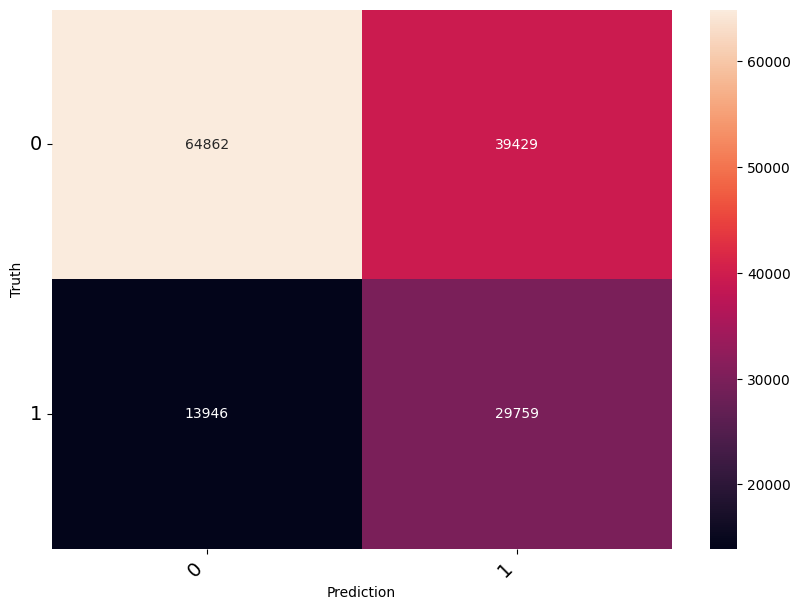

In [42]:
y_pred_prob_nn2 = model_nn2.predict(X_test)
y_pred_nn2 = np.where(y_pred_prob_nn2 > 0.5, 1, 0)[:, 0]
confusion_matrixs = confusion_matrix(y_test,y_pred_nn2)
print_confusion_matrix(confusion_matrixs,['0','1'])
print(classification_report(y_test,y_pred_nn2))

### Prediction Probability Distribution Plot of Final NN2 Model

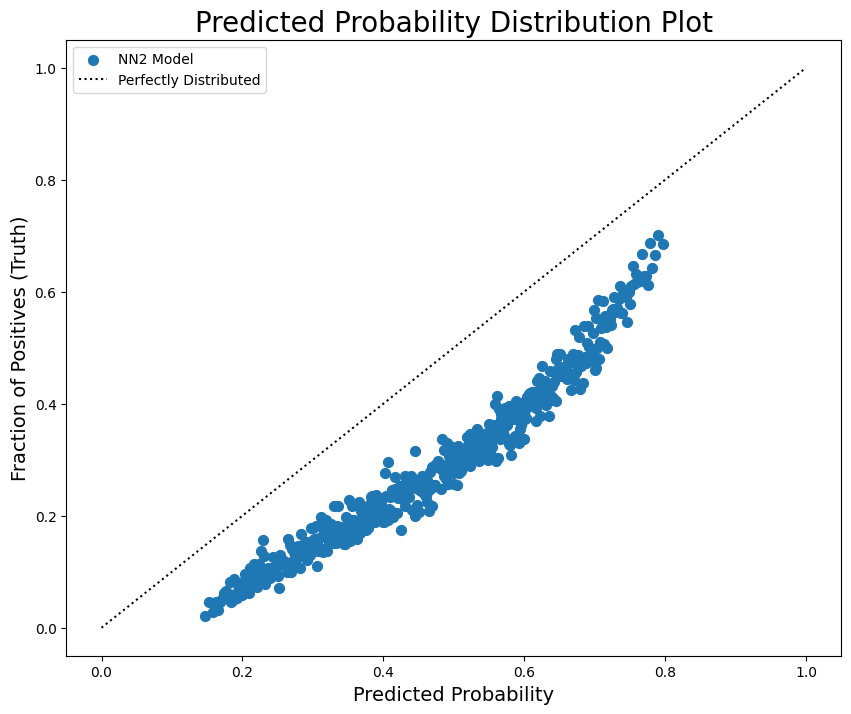

In [191]:
predicted_prob = model_nn2.predict(X_validation)
probability = pd.DataFrame(y_validation)
probability.columns= ['truth']
probability['predicted_prob'] = predicted_prob
plot_distribution_predictions(y_proba_pred=probability['predicted_prob'],y_true=probability['truth'],labels='NN2 Model',x_bins=500)